In [29]:
import pandas as pd
import numpy as np

root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/'
msk_dir = f"{root_dir}/global_city/dat/vld_cty_"
prf_dir = f"{root_dir}/global_city/dat/cty_prf_"
wup_path = f"{root_dir}/global_city/dat/cty_lst_/gpw4/WUP2018_300k_2010_regionadded.txt"
class_path = f"{root_dir}/global_city/dat/non_prf_/vld_cty_/classification.txt"
gpw_path = f"{root_dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5"
riv_path = f"{root_dir}/global_city/dat/riv_out_/W5E5LR__00000000.gl5"
log_path = f"{root_dir}/global_city/dat/cty_lst_/gpw4/cluster.log"
mcy_path = f"{root_dir}/global_city/dat/cty_lst_/gpw4/mcy_pop_water.txt"

save_file = f"{root_dir}/global_city/dat/cty_lst_/gpw4/potential.txt"

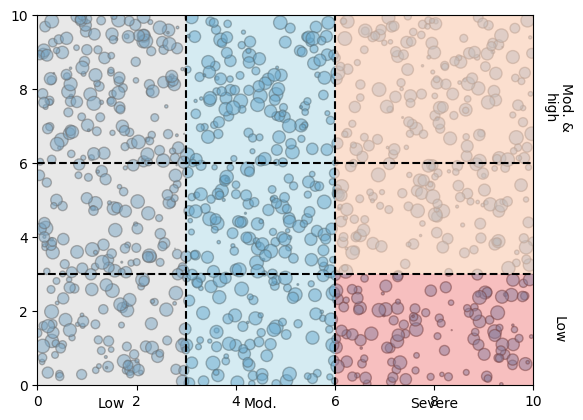

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# サンプルデータを生成
x = np.random.rand(1000) * 10
y = np.random.rand(1000) * 10
sizes = np.random.rand(1000) * 100

# 散布図を作成
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, s=sizes, alpha=0.5, edgecolors="k")

# x軸に垂直な線分で区切る
ax.axvline(x=3, color='black', linestyle='--')
ax.axvline(x=6, color='black', linestyle='--')

# y軸に垂直な線分で区切る
ax.axhline(y=3, color='black', linestyle='--')
ax.axhline(y=6, color='black', linestyle='--')

# 色付きの背景を追加
# 低、中、高、重度の領域を色分け
ax.axvspan(0, 3, facecolor='lightgrey', alpha=0.5)
ax.axvspan(3, 6, facecolor='lightblue', alpha=0.5)
ax.axvspan(6, 10, facecolor='lightcoral', alpha=0.5)

ax.axhspan(3, 10, xmin=0.6, xmax=1.0, facecolor='lightyellow', alpha=0.5)

# ラベルを追加
ax.text(1.5, -0.5, 'Low', ha='center', va='center')
ax.text(4.5, -0.5, 'Mod.', ha='center', va='center')
ax.text(8, -0.5, 'Severe', ha='center', va='center')
ax.text(10.5, 7.5, 'Mod. &\nhigh', ha='center', va='center', rotation=-90)
ax.text(10.5, 1.5, 'Low', ha='center', va='center', rotation=-90)

# 軸範囲を設定
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()


In [38]:
#mcy = [citynum, flag, rate, wup, pop, avail, mpcy, gridnum, region, country, cityname]
with open(mcy_path, 'r') as files:
    text = files.readlines()

data = []

for ind in range(1860):
    line = text[ind]
    parts = line.split('|')
    parts = [item.strip() for item in parts]
    city_num = int(parts[0])
    flag = parts[1]
    if flag == 'NoMASK':
        continue
    else:
        rate = parts[2]
        wup = float(parts[3])
        dwn = float(parts[4])
        dwn_unit = dwn/1e6
        ava = float(parts[5])
        ava_unit = ava/1e9
        mcy = float(parts[6])
        if ava_unit > dwn_unit:
            scarsity = False
        else:
            scarsity = True
        cel = int(float(parts[7]))
        region = parts[8]
        country = parts[9]
        city_name = parts[10]

    data.append([city_num, city_name, scarsity, dwn_unit, ava_unit, mcy, region, country])

#df = pd.DataFrame(data, columns=['city_num', 'city_name', 'population[Million]', 'water availability[Million m3]', 'MPCY', 'region', 'country'])
df = pd.DataFrame(data, columns=['city_num', 'city_name', 'scarcity', 'population', 'water availability', 'MPCY', 'region', 'country'])
df_sorted = df.sort_values(by='population', ascending=False)

def round_significant(x, sig=3):
    return round(x, sig - int(np.floor(np.log10(abs(x))))- 1)
                 
df_sorted['population'] = df_sorted['population'].apply(lambda x: round_significant(x))
df_sorted['water availability'] = df_sorted['water availability'].apply(lambda x: round_significant(x))
df_sorted['MPCY'] = df_sorted['MPCY'].apply(lambda x: round_significant(x))
                 
print(len(df_sorted))
df_sorted.head(50)

1553


,city_num,city_name,scarcity,population,water availability,MPCY,region,country
0,1,Tokyo,True,31.80,14.2000,448.00,eastern asia,Japan
1,2,Delhi,True,22.10,4.4200,200.00,southern asia,India
3,4,Ciudad de México (Mexico City),True,20.20,0.3010,14.90,central america,Mexico
8,9,Al-Qahirah (Cairo),False,17.00,711.0000,41800.00,northern africa,Egypt
10,11,Dhaka,True,14.90,0.0957,6.42,southern asia,Bangladesh
2,3,Shanghai,False,14.50,16.4000,1130.00,eastern asia,China
12,13,Kolkata (Calcutta),False,14.50,31.8000,2200.00,southern asia,India
7,8,Mumbai (Bombay),True,14.30,9.2500,647.00,southern asia,India
9,10,Beijing,True,13.50,2.3600,174.00,eastern asia,China
11,12,Buenos Aires,True,13.30,0.7010,52.80,south america,Argentina


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# サンプルデータを生成
x = np.random.rand(1000) * 10
y = np.random.rand(1000) * 10
sizes = np.random.rand(1000) * 100

# 散布図を作成
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, s=sizes, alpha=0.5, edgecolors="k")

# x軸に垂直な線分で区切る
ax.axvline(x=3, color='black', linestyle='--')
ax.axvline(x=6, color='black', linestyle='--')

# y軸に垂直な線分で区切る
ax.axhline(y=3, color='black', linestyle='--')
ax.axhline(y=6, color='black', linestyle='--')

# 色付きの背景を追加
# 低、中、高、重度の領域を色分け
ax.axvspan(0, 3, facecolor='lightgrey', alpha=0.5)
ax.axvspan(3, 6, facecolor='lightblue', alpha=0.5)
ax.axvspan(6, 10, facecolor='lightcoral', alpha=0.5)

ax.axhspan(3, 10, xmin=0.6, xmax=1.0, facecolor='lightyellow', alpha=0.5)

# ラベルを追加
ax.text(1.5, -0.5, 'Low', ha='center', va='center')
ax.text(4.5, -0.5, 'Mod.', ha='center', va='center')
ax.text(8, -0.5, 'Severe', ha='center', va='center')
ax.text(10.5, 7.5, 'Mod. &\nhigh', ha='center', va='center', rotation=-90)
ax.text(10.5, 1.5, 'Low', ha='center', va='center', rotation=-90)

# 軸範囲を設定
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()